####Problem Statement
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19. So, the analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.

This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country.

In [1]:
#Filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [3]:
df=pd.read_csv("Unemployment in India.csv")

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory Data Analysis ####

In [7]:
df.shape

(768, 7)

In [8]:
df.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN

In [9]:
#Checking for null percentage

round(df.isnull().sum()/df.shape[0]*100,2)

Region                                      3.65
 Date                                       3.65
 Frequency                                  3.65
 Estimated Unemployment Rate (%)            3.65
 Estimated Employed                         3.65
 Estimated Labour Participation Rate (%)    3.65
Area                                        3.65
dtype: float64

Since the null percentage is less than 5, We shall delete the rows with null values as it will not effect our analysis

In [11]:
# deleting the null rows
df.dropna(inplace=True)
df.shape

(740, 7)

There was 28 null rows and we deleted it and left 740 rowsfor the analysis

In [13]:
#renaming the colums for easier access
# We shall rename the columns for easier access
df = df.rename(columns={' Date' : 'Date',' Frequency': 'Frequency' ,' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp_Rate',' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)

#rounding estimated employed column for a better visualizing
df['Est_Emp_Rate']=round((df['Est_Emp_Rate']/1000000),2)
df.head()


,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12.26,44.68,Rural


In [14]:
#Changing the dtype of 'Date' column
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Frequency        740 non-null    object        
 3   Est_Unemp_Rate   740 non-null    float64       
 4   Est_Emp_Rate     740 non-null    float64       
 5   Est_Labour_Rate  740 non-null    float64       
 6   Area             740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [15]:
 #checking if there are no duplicate rows in the data set
df.duplicated().sum()

0

In [16]:
#Important to note that there is a typo in the 'Frequency' column
df.Frequency.value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [17]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Est_Unemp_Rate', 'Est_Emp_Rate',
       'Est_Labour_Rate', 'Area'],
      dtype='object')

Since boyh date and frequency represent the same things and there is only typo error 
we can delete the freq column as it is insignificant forour analysis

In [19]:
df=df.drop(['Frequency'],axis=1)

In [20]:
df.shape

(740, 6)

In [21]:
#we shall create a new column for year and month to analyse the between 2019 to 2020
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df.head()

,Region,Date,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area,Year,Month
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural,2019,9


Now there are 8 columns in the data set to be analyzed

In [23]:
#Analysing the area column
df.Area.value_counts(normalize=True)*100

Area
Urban    51.486486
Rural    48.513514
Name: proportion, dtype: float64

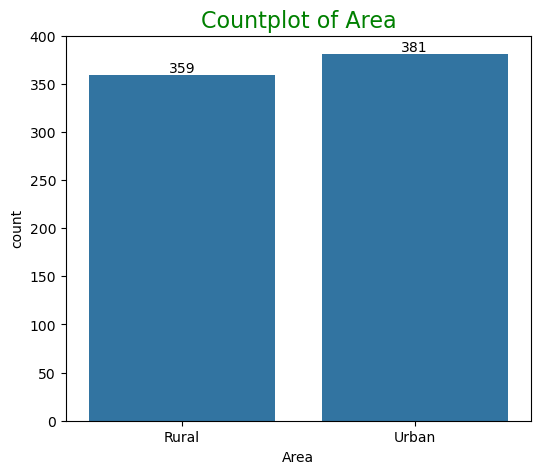

In [24]:
plt.figure(figsize=[6,5])
ax=sns.countplot(data=df,x='Area')
plt.title("Countplot of Area", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})
for x in ax.containers:
        ax.bar_label(x,rotation=0)
plt.show()

We have almost 50 % data from both rural and urban areas. We should note the urban areas have high unemployment rate as compared to rural area.

In [26]:
#Analyzing the region column
df.Region.value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

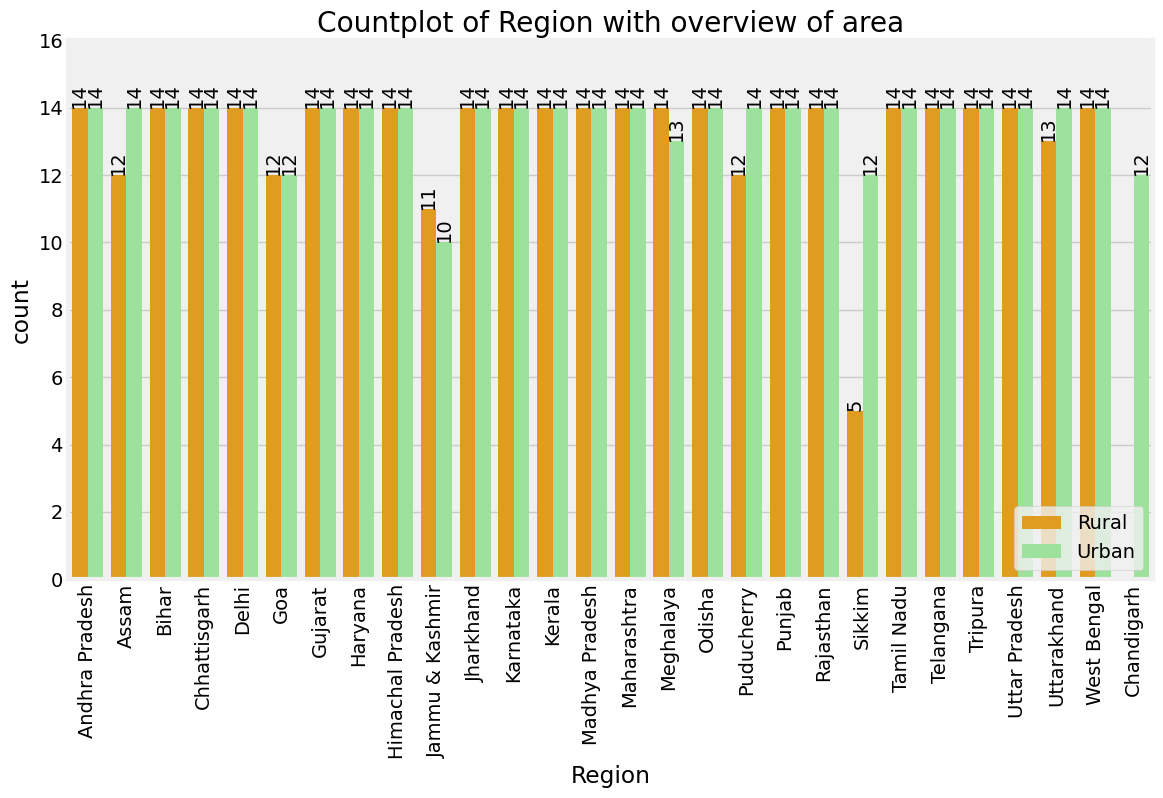

In [27]:
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
ax=sns.countplot(x=df['Region'],hue=df['Area'], palette = ['orange','lightgreen'] )
plt.legend(loc = 'lower right')
for x in ax.containers:
    ax.bar_label(x,rotation=90)
plt.xticks(rotation=90)
plt.ylim(0,16)
plt.title('Countplot of Region with overview of area')
plt.show()

Majority of the states have an equal share of unemployment rate in Rural as well as Urban areas.
Sikkim has the lowest unemployment rate in Rural areas

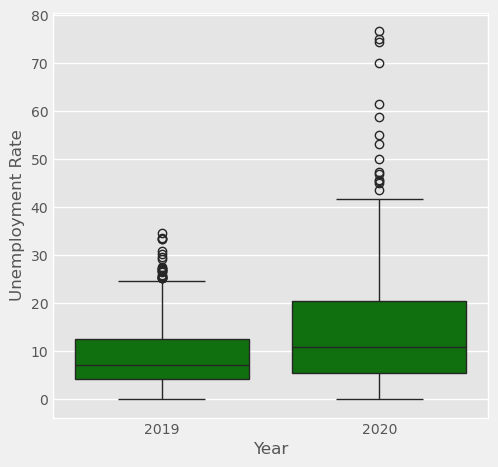

In [29]:
#analysing the unemployment rate column
plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y=df['Est_Unemp_Rate'],x=df['Year'], color='green')
plt.ylabel('Unemployment Rate')
plt.show()

Due to Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020

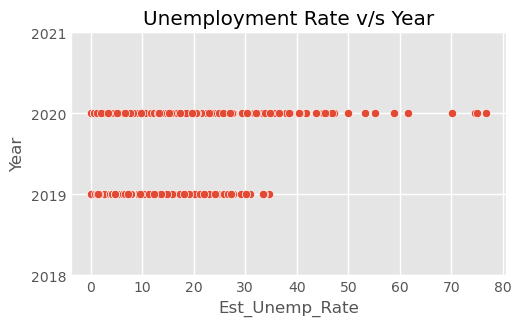

In [31]:
plt.figure(figsize=(5,3))
plt.style.use('ggplot')
sns.scatterplot(x=df['Est_Unemp_Rate'],y=df['Year'])
plt.ylim(2018,2021)
plt.yticks([2018,2019,2020,2021])
plt.title('Unemployment Rate v/s Year')
plt.show()

We can clearly see that in 2020 there was an increase in the unemployment rate after the rise of Covid-19.

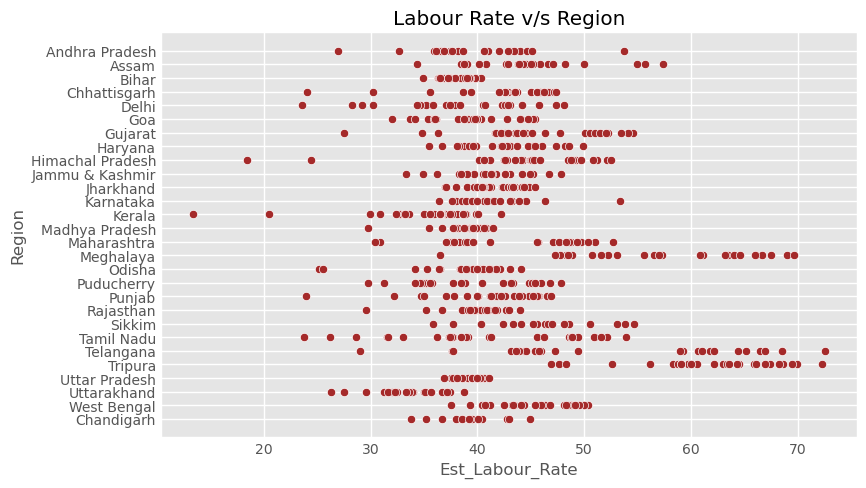

In [33]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x=df['Est_Labour_Rate'],y=df['Region'], color = 'brown')
plt.title('Labour Rate v/s Region')
plt.show()

Meghalaya, Tripura and Telangana have high Labour rate.

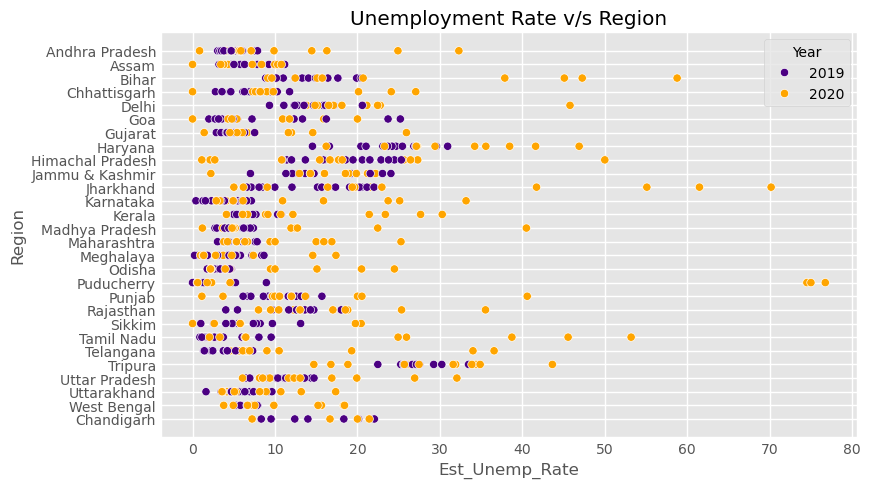

In [35]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x=df['Est_Unemp_Rate'],y=df['Region'],hue=df['Year'], palette =['indigo','orange'])
plt.title('Unemployment Rate v/s Region')
plt.show()

In 2019, unemployment rate was less as compared to 2020. Also in Puducherry,Jharkhand, Bihar the unemployement rate increased in 2020 due to pandemic.

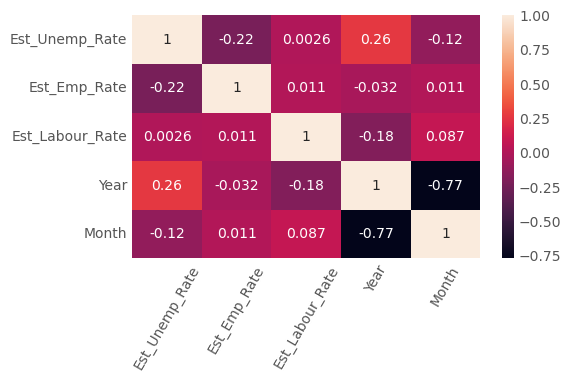

In [129]:
#correlation heatmap
#plt.figure(figsize=(5,3))
df1 = pd.DataFrame(df)
df2=df1.loc[:,['Est_Unemp_Rate','Est_Emp_Rate','Est_Labour_Rate','Year','Month']]
plt.figure(figsize=(5,3))
sns.heatmap(df2.corr(),annot=True)
plt.xticks(rotation=60)
plt.show()

We can see that Year and Unemployment have a positive correlation between them and coefficient going towards zero. So, We can say a relationship between emp_rate and year is weeker.

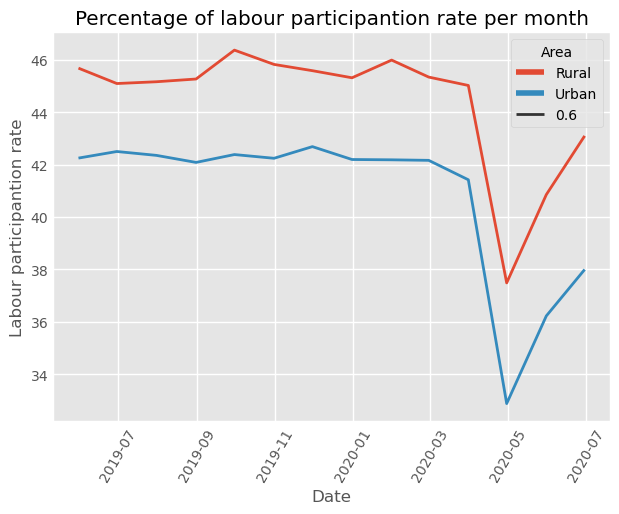

In [135]:
sns.lineplot(data=df, x='Date', y='Est_Labour_Rate', hue='Area', errorbar= None, size = 0.6)
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('Labour participantion rate')
plt.xticks(rotation= 60)
plt.show()

The graph shows a steep decline in the labour partcipation during the time when pandemic was at its peak in both areas. But in Urban areas there is a much degradation than in rural areas